In [1450]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1451]:
from sklearn.datasets import make_circles

n_samples = 1000

x , y = make_circles(n_samples , noise=0.03 , random_state = 42)

In [1452]:
x.shape , y.shape

((1000, 2), (1000,))

In [1453]:
x0 = x[: , 0]
x1 = x[: , 1]

In [1454]:
df = pd.DataFrame({'x0' : x0 , 'x1' : x1 , 'y' : y})

In [1455]:
df

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [1456]:
df.y.value_counts()

1    500
0    500
Name: y, dtype: int64

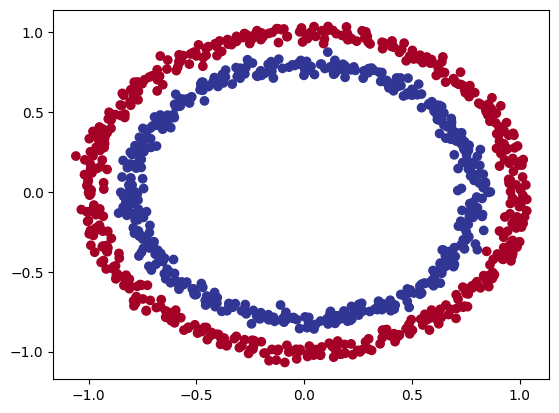

In [1457]:
plt.scatter(x=x0,y=x1,c=y,cmap=plt.cm.RdYlBu)

In [1458]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [1459]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [1460]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [1461]:
class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2 , out_features=10)
    self.layer2 = nn.Linear(in_features=10 , out_features = 1)

  def forward(self , x):
    return self.layer2(self.layer1(x))

model0 = ClassificationModel()

In [1462]:
model0

ClassificationModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [1463]:
untrained_pred = model0(x_test)
untrained_pred[:10] , y_test[:10]

(tensor([[-0.1566],
         [ 0.0115],
         [-0.3692],
         [-0.0972],
         [-0.0075],
         [ 0.0922],
         [ 0.2788],
         [ 0.2986],
         [-0.3842],
         [ 0.0268]], grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [1464]:
untrained_pred.squeeze()[:10]

tensor([-0.1566,  0.0115, -0.3692, -0.0972, -0.0075,  0.0922,  0.2788,  0.2986,
        -0.3842,  0.0268], grad_fn=<SliceBackward0>)

In [1465]:
lossfn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(params = model0.parameters() , lr=0.1)

In [1466]:
def accuracy_fn(y_actual , y_pred):
  correct = torch.eq(y_actual , y_pred).sum().item() #item extracts a single value from array
  accuracy = (correct/len(y_pred))*100
  return accuracy

In [1467]:
ylogits = model0(x_test) #untrained prediction = logit
ylogits

tensor([[-1.5655e-01],
        [ 1.1504e-02],
        [-3.6923e-01],
        [-9.7232e-02],
        [-7.5394e-03],
        [ 9.2249e-02],
        [ 2.7878e-01],
        [ 2.9861e-01],
        [-3.8417e-01],
        [ 2.6769e-02],
        [-1.8127e-01],
        [-9.5077e-02],
        [ 3.0314e-01],
        [-3.5054e-01],
        [-4.3871e-01],
        [ 1.8863e-01],
        [ 1.1961e-01],
        [-2.6577e-01],
        [-2.4393e-01],
        [-3.4325e-01],
        [ 1.2976e-02],
        [ 2.6225e-01],
        [-2.8684e-01],
        [-3.3320e-01],
        [ 2.1742e-01],
        [ 2.7517e-01],
        [-2.5987e-01],
        [ 1.7956e-01],
        [-4.6757e-01],
        [-2.9428e-01],
        [ 1.8553e-01],
        [ 2.0456e-01],
        [-1.5116e-01],
        [-1.3214e-01],
        [-1.8610e-01],
        [ 3.3921e-02],
        [-1.0212e-01],
        [-3.6201e-01],
        [-1.9464e-01],
        [-3.2821e-01],
        [-3.0640e-01],
        [-3.8695e-01],
        [ 1.2025e-01],
        [-1

In [1468]:
ypredprob = torch.sigmoid(ylogits)
ypredprob

tensor([[0.4609],
        [0.5029],
        [0.4087],
        [0.4757],
        [0.4981],
        [0.5230],
        [0.5692],
        [0.5741],
        [0.4051],
        [0.5067],
        [0.4548],
        [0.4762],
        [0.5752],
        [0.4133],
        [0.3920],
        [0.5470],
        [0.5299],
        [0.4339],
        [0.4393],
        [0.4150],
        [0.5032],
        [0.5652],
        [0.4288],
        [0.4175],
        [0.5541],
        [0.5684],
        [0.4354],
        [0.5448],
        [0.3852],
        [0.4270],
        [0.5463],
        [0.5510],
        [0.4623],
        [0.4670],
        [0.4536],
        [0.5085],
        [0.4745],
        [0.4105],
        [0.4515],
        [0.4187],
        [0.4240],
        [0.4045],
        [0.5300],
        [0.4961],
        [0.4634],
        [0.5148],
        [0.5120],
        [0.5019],
        [0.5006],
        [0.5129],
        [0.4725],
        [0.4655],
        [0.5512],
        [0.4829],
        [0.5526],
        [0

In [1469]:
ylogits[:5] ,ypredprob[:5]

(tensor([[-0.1566],
         [ 0.0115],
         [-0.3692],
         [-0.0972],
         [-0.0075]], grad_fn=<SliceBackward0>),
 tensor([[0.4609],
         [0.5029],
         [0.4087],
         [0.4757],
         [0.4981]], grad_fn=<SliceBackward0>))

In [1470]:
ypred = torch.round(ypredprob)
ypred[:5].squeeze() , y_test[:5]

(tensor([0., 1., 0., 0., 0.], grad_fn=<SqueezeBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [1471]:
torch.manual_seed(42)

epoch = 1000

for i in range(epoch):
  model0.train()

  ylogit = model0(x_train).squeeze()
  ysigmoid = torch.sigmoid(ylogit)
  ypred = torch.round(ysigmoid)

  loss = lossfn(ylogit , y_train)
  accuracy = accuracy_fn(y_train , ypred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model0.eval()

  with torch.inference_mode():
    testlogit = model0(x_test).squeeze()
    testsigmoid = torch.sigmoid(testlogit)
    testpred = torch.round(testsigmoid)

    testloss = lossfn(testlogit,y_test)
    test_acc = accuracy_fn(y_test , testpred)

  if i % 100 == 0:
    print(f"Epoch: {i} | Train Loss: {loss} | Train Accuracy : {accuracy} | Test Loss :{testloss} | Test Accuracy : {test_acc}")

Epoch: 0 | Train Loss: 0.6998868584632874 | Train Accuracy : 48.375 | Test Loss :0.7062891125679016 | Test Accuracy : 49.0
Epoch: 100 | Train Loss: 0.6930846571922302 | Train Accuracy : 51.37500000000001 | Test Loss :0.6958187222480774 | Test Accuracy : 46.5
Epoch: 200 | Train Loss: 0.6929833292961121 | Train Accuracy : 51.37500000000001 | Test Loss :0.6949045062065125 | Test Accuracy : 45.5
Epoch: 300 | Train Loss: 0.6929799914360046 | Train Accuracy : 51.24999999999999 | Test Loss :0.6947274804115295 | Test Accuracy : 46.0
Epoch: 400 | Train Loss: 0.6929798126220703 | Train Accuracy : 51.125 | Test Loss :0.6946898698806763 | Test Accuracy : 46.0
Epoch: 500 | Train Loss: 0.6929798722267151 | Train Accuracy : 51.0 | Test Loss :0.6946818828582764 | Test Accuracy : 46.0
Epoch: 600 | Train Loss: 0.6929798722267151 | Train Accuracy : 51.0 | Test Loss :0.6946800947189331 | Test Accuracy : 46.0
Epoch: 700 | Train Loss: 0.6929798722267151 | Train Accuracy : 51.0 | Test Loss :0.694679737091064

In [1472]:
#the above model is not giving good accuracy

In [1473]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


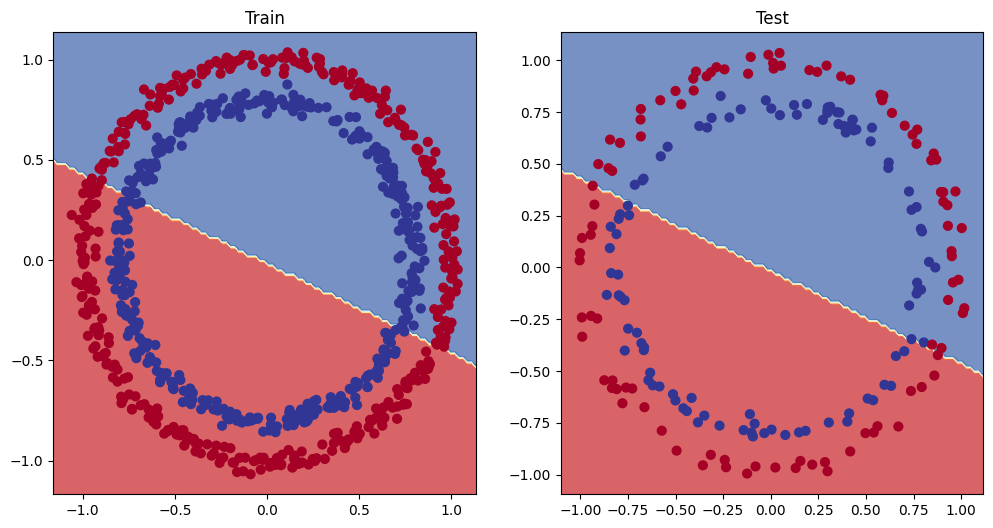

In [1474]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model0 , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model0,x_test , y_test)

In [1475]:
#another model adding extra hidden layer

In [1476]:
class ClassificationModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2 , out_features = 10)
    self.layer2 = nn.Linear(in_features=10 , out_features = 10)
    self.layer3 = nn.Linear(in_features=10 , out_features = 1)

  def forward(self , x):
    return self.layer3(self.layer2(self.layer1(x)))

model1 = ClassificationModel1()

In [1477]:
model1

ClassificationModel1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [1478]:
lossfn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(model1.parameters(),lr=0.1)

In [1479]:
torch.manual_seed(42)

epoch = 1000

for i in range(epoch):
  ylogit = model1(x_train).squeeze()
  ysigmoid = torch.sigmoid(ylogit)
  ypred = torch.round(ysigmoid)

  loss = lossfn(ylogit , y_train)
  acc = accuracy_fn(y_train , ypred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model1.eval()
  with torch.inference_mode():
    testlogit = model1(x_test).squeeze()
    testsigmoid = torch.sigmoid(testlogit)
    testpred = torch.round(testsigmoid)

  testloss = lossfn(testlogit , y_test)
  testacc = accuracy_fn(y_test , testpred)

  if i % 100 == 0:
    print(f"Epoch : {i} | Train Loss : {loss} | Test Loss : {testloss} | Train Accuracy : {acc} | Test Accuracy : {testacc}")

Epoch : 0 | Train Loss : 0.6939550638198853 | Test Loss : 0.6926146745681763 | Train Accuracy : 50.875 | Test Accuracy : 51.0
Epoch : 100 | Train Loss : 0.6930477619171143 | Test Loss : 0.6937903761863708 | Train Accuracy : 50.375 | Test Accuracy : 48.0
Epoch : 200 | Train Loss : 0.692986011505127 | Test Loss : 0.6943727135658264 | Train Accuracy : 51.125 | Test Accuracy : 46.0
Epoch : 300 | Train Loss : 0.6929805278778076 | Test Loss : 0.6945767998695374 | Train Accuracy : 51.625 | Test Accuracy : 45.0
Epoch : 400 | Train Loss : 0.6929798722267151 | Test Loss : 0.6946452260017395 | Train Accuracy : 51.125 | Test Accuracy : 46.0
Epoch : 500 | Train Loss : 0.6929798722267151 | Test Loss : 0.6946679949760437 | Train Accuracy : 51.0 | Test Accuracy : 46.0
Epoch : 600 | Train Loss : 0.6929798722267151 | Test Loss : 0.694675624370575 | Train Accuracy : 51.0 | Test Accuracy : 46.0
Epoch : 700 | Train Loss : 0.6929798722267151 | Test Loss : 0.6946781873703003 | Train Accuracy : 51.0 | Test Ac

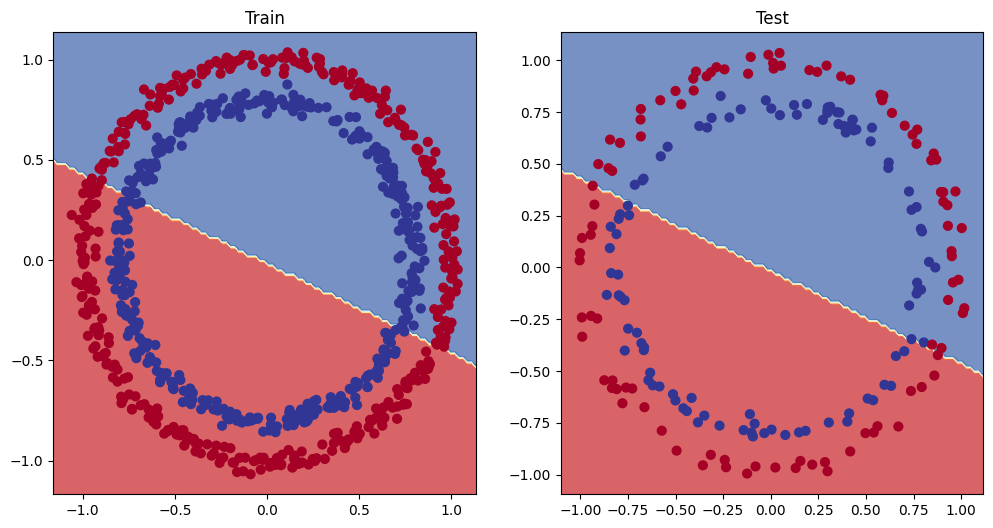

In [1480]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model1 , x_train , y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model1 , x_test , y_test)

In [1481]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()

In [1482]:
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [1483]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [1484]:
torch.manual_seed(42)
epochs = 2000

for epoch in range(epochs):

    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():

      test_logits = model_3(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test,test_pred)

    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss : {test_loss} | Train Accuracy: {acc} | Test Accuracy: {test_acc}")

Epoch: 0 | Train Loss: 0.69295 | Test Loss : 0.6931881904602051 | Train Accuracy: 50.0 | Test Accuracy: 50.0
Epoch: 200 | Train Loss: 0.68977 | Test Loss : 0.6893961429595947 | Train Accuracy: 53.37499999999999 | Test Accuracy: 55.00000000000001
Epoch: 400 | Train Loss: 0.68517 | Test Loss : 0.684114933013916 | Train Accuracy: 52.75 | Test Accuracy: 56.49999999999999
Epoch: 600 | Train Loss: 0.67515 | Test Loss : 0.6728507876396179 | Train Accuracy: 54.50000000000001 | Test Accuracy: 56.00000000000001
Epoch: 800 | Train Loss: 0.65160 | Test Loss : 0.647568941116333 | Train Accuracy: 64.0 | Test Accuracy: 67.5
Epoch: 1000 | Train Loss: 0.56818 | Test Loss : 0.5737816095352173 | Train Accuracy: 87.75 | Test Accuracy: 86.5
Epoch: 1200 | Train Loss: 0.37056 | Test Loss : 0.40594878792762756 | Train Accuracy: 97.75 | Test Accuracy: 92.0
Epoch: 1400 | Train Loss: 0.17180 | Test Loss : 0.22108420729637146 | Train Accuracy: 99.5 | Test Accuracy: 97.5
Epoch: 1600 | Train Loss: 0.09123 | Test Lo

In [1485]:
model_3.eval()
with torch.inference_mode():
  test_pred = torch.round(torch.sigmoid(model_3(x_test))).squeeze()

test_pred[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

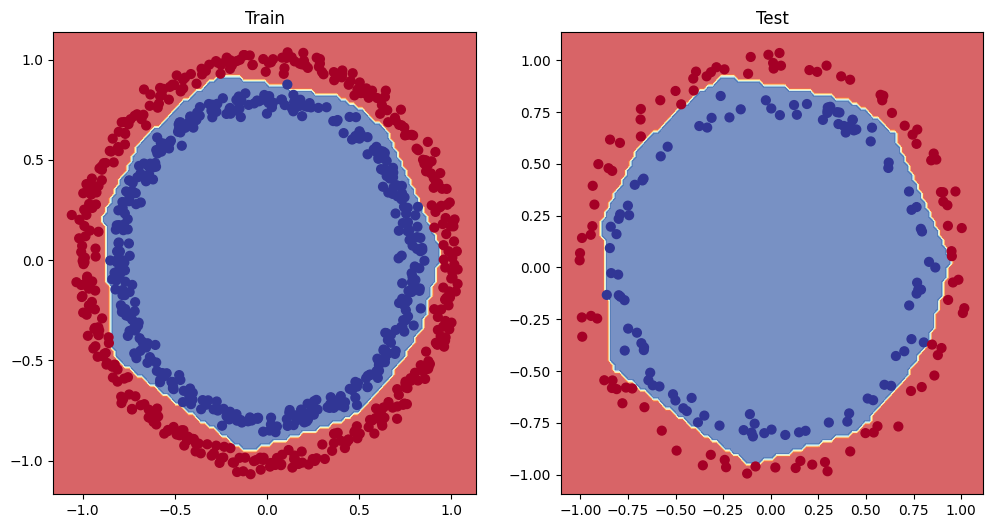

In [1486]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3 , x_train , y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3 , x_test , y_test)

In [1487]:
#multiclass classification

In [1488]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [1489]:
from sklearn.datasets import make_blobs

x , y = make_blobs(n_samples=1000 , n_features = 2 , centers = 4 , cluster_std = 1.5 , random_state = 42)

In [1490]:
x.shape , y.shape

((1000, 2), (1000,))

In [1491]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [1492]:
x0 = x[: , 0]
x1 = x[: , 1]

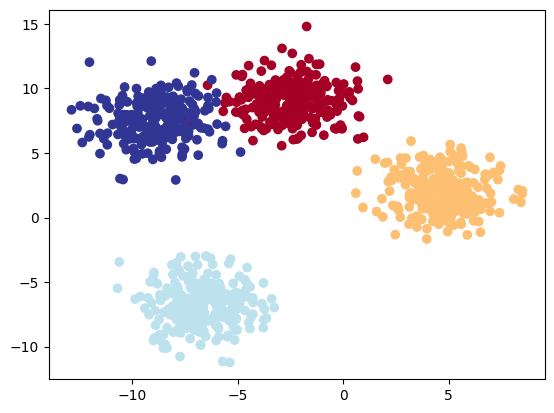

In [1493]:
plt.scatter(x0 , x1 , c=y , cmap = plt.cm.RdYlBu)

In [1494]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [1495]:
class MulticlassModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features= 2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10 ,out_features =10),
        nn.ReLU(),
        nn.Linear(in_features=10 , out_features=4)
    )

  def forward(self , x):
    return self.layer(x)
model4 = MulticlassModel()

In [1496]:
model4

MulticlassModel(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [1497]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model4.parameters(),lr=0.1)

In [1498]:
def accuracy_fn(y_actual, y_pred):
    correct = torch.eq(y_actual, y_pred).sum().item()
    total_samples = len(y_actual)
    accuracy = (correct / total_samples) * 100
    return accuracy

In [1499]:
torch.manual_seed(42)

epoch = 1000

for i in range(epoch):

  model4.train()

  ylogit = model4(x_train)
  ysoftmax = torch.softmax(ylogit,dim=1)
  ypred = ysoftmax.argmax(dim=1)

  loss = lossfn(ylogit , y_train)
  acc = accuracy_fn(y_train , ypred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model0.eval()
  with torch.inference_mode():
    testlogit = model4(x_test)
    testpred = torch.softmax(test_logits, dim=0).argmax().item()

    testloss = lossfn(testlogit,y_test)
    testacc = accuracy_fn(y_test , testpred)

    if epoch % 100 == 0:
      print(f"Epoch : {i} | Train Loss : {loss} | Test Loss : {test_loss} | Train Accuracy : {acc} | Test Accuracy : {test_acc}")


Epoch : 0 | Train Loss : 1.5086679458618164 | Test Loss : 0.06591331958770752 | Train Accuracy : 2.75 | Test Accuracy : 100.0
Epoch : 1 | Train Loss : 1.4062691926956177 | Test Loss : 0.06591331958770752 | Train Accuracy : 1.625 | Test Accuracy : 100.0
Epoch : 2 | Train Loss : 1.3646209239959717 | Test Loss : 0.06591331958770752 | Train Accuracy : 0.5 | Test Accuracy : 100.0
Epoch : 3 | Train Loss : 1.3337085247039795 | Test Loss : 0.06591331958770752 | Train Accuracy : 6.0 | Test Accuracy : 100.0
Epoch : 4 | Train Loss : 1.3079811334609985 | Test Loss : 0.06591331958770752 | Train Accuracy : 16.375 | Test Accuracy : 100.0
Epoch : 5 | Train Loss : 1.2750180959701538 | Test Loss : 0.06591331958770752 | Train Accuracy : 39.0 | Test Accuracy : 100.0
Epoch : 6 | Train Loss : 1.2351382970809937 | Test Loss : 0.06591331958770752 | Train Accuracy : 46.25 | Test Accuracy : 100.0
Epoch : 7 | Train Loss : 1.1985336542129517 | Test Loss : 0.06591331958770752 | Train Accuracy : 49.5 | Test Accurac

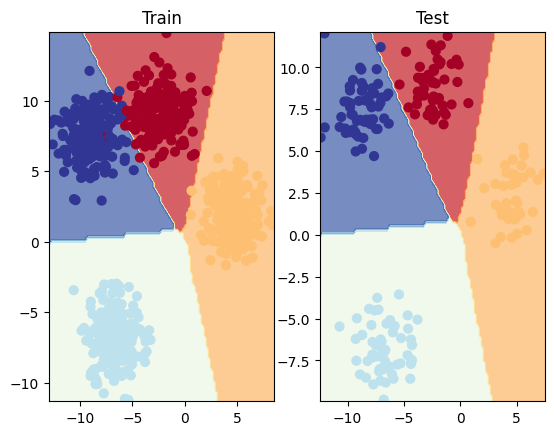

In [1500]:
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model4 , x_train , y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model4 , x_test , y_test)

In [1501]:
#another binary classification

In [1502]:
from sklearn.datasets import make_moons
n_samples = 1000
x , y = make_moons(n_samples , noise = 0.15 , random_state = 42)

In [1503]:
x.shape , y.shape

((1000, 2), (1000,))

In [1504]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [1505]:
x0 = x[ : , 0]
x1 = x[ : , 1]

In [1506]:
df = pd.DataFrame({'x0' : x0 , 'x1' : x1 , 'y' : y})

In [1507]:
df

,x0,x1,y
0,-0.081568,0.482211,1.0
1,1.087333,-0.381159,1.0
2,0.831725,-0.133135,1.0
3,0.200339,-0.500300,1.0
4,-0.824953,0.539526,0.0
...,...,...,...
995,0.823239,0.481376,0.0
996,-0.179065,0.873266,0.0
997,1.705934,-0.388526,1.0
998,-0.990844,0.199451,0.0


In [1508]:
df.y.value_counts()

1.0    500
0.0    500
Name: y, dtype: int64

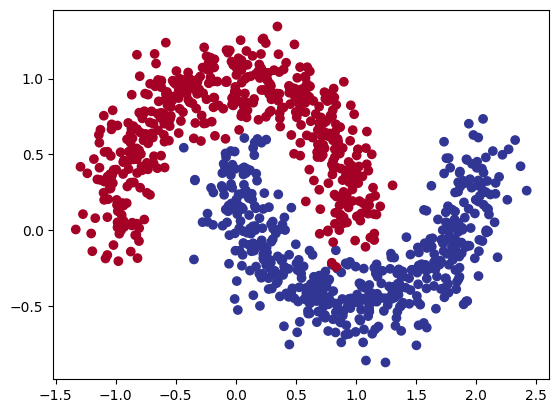

In [1509]:
plt.scatter(x= x0 , y= x1 , c = y , cmap = plt.cm.RdYlBu)

In [1510]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [1511]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [1512]:
class classificationmakemoons(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer3 = nn.Linear(in_features = 10 , out_features = 1)
    self.relu = nn.ReLU()

  def forward(self , x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

modelmakemoons = classificationmakemoons()

In [1513]:
modelmakemoons

classificationmakemoons(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [1514]:
lossfn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(modelmakemoons.parameters() , lr = 0.1)

In [1515]:
torch.manual_seed(42)

epoch = 1000
for epoch in range(epoch):

    modelmakemoons.train()
    ytrain_logits = modelmakemoons(x_train).squeeze()
    ytrain_pred = torch.round(torch.sigmoid(ytrain_logits))
    ytrain_loss = lossfn(ytrain_logits,y_train)
    ytrain_acc = accuracy_fn(y_train, ytrain_pred)
    optimiser.zero_grad()
    ytrain_loss.backward()
    optimiser.step()
    modelmakemoons.eval()

    with torch.inference_mode():
        ytest_logits = modelmakemoons(x_test).squeeze()
        ytest_pred = torch.round(torch.sigmoid(ytest_logits))
        ytest_loss = lossfn(ytest_logits , y_test)
        ytest_acc = accuracy_fn(y_test , ytest_pred)
    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Train Loss : {ytrain_loss} | Test Loss : {ytest_loss} | Train Accuracy : {ytrain_acc} | Test Accuracy : {ytest_acc}")

Epoch : 0 | Train Loss : 0.6950998902320862 | Test Loss : 0.6941787004470825 | Train Accuracy : 38.0 | Test Accuracy : 49.5
Epoch : 100 | Train Loss : 0.3981887400150299 | Test Loss : 0.41216811537742615 | Train Accuracy : 80.75 | Test Accuracy : 77.0
Epoch : 200 | Train Loss : 0.26787564158439636 | Test Loss : 0.2646061182022095 | Train Accuracy : 88.125 | Test Accuracy : 87.5
Epoch : 300 | Train Loss : 0.23489384353160858 | Test Loss : 0.2238057553768158 | Train Accuracy : 89.625 | Test Accuracy : 89.0
Epoch : 400 | Train Loss : 0.2095414698123932 | Test Loss : 0.19526366889476776 | Train Accuracy : 90.375 | Test Accuracy : 91.5
Epoch : 500 | Train Loss : 0.17689062654972076 | Test Loss : 0.1602059304714203 | Train Accuracy : 92.25 | Test Accuracy : 93.5
Epoch : 600 | Train Loss : 0.1411362588405609 | Test Loss : 0.12373090535402298 | Train Accuracy : 94.625 | Test Accuracy : 95.5
Epoch : 700 | Train Loss : 0.10946287959814072 | Test Loss : 0.09211515635251999 | Train Accuracy : 96.8

In [1516]:
modelmakemoons.eval()
with torch.inference_mode():
  ypred_temp = torch.round(torch.sigmoid(modelmakemoons(x_test))).squeeze()

ypred_temp[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

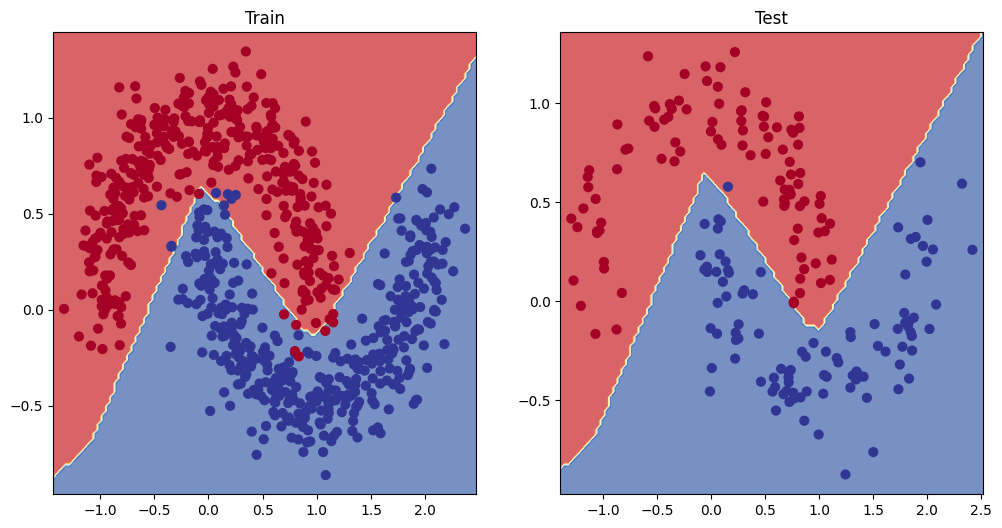

In [1517]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(modelmakemoons , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(modelmakemoons , x_test , y_test)

In [1518]:
#another multiclass classification

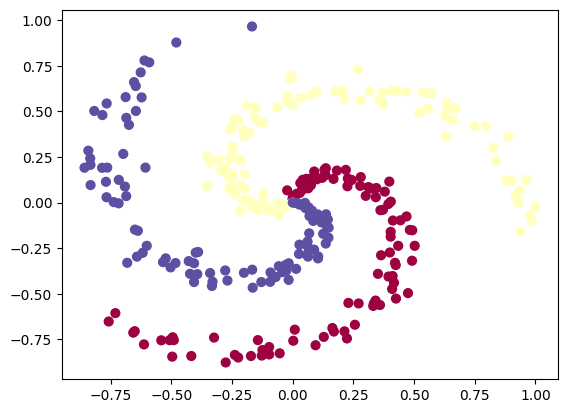

In [1519]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
x = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [1520]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [1521]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [1522]:
class ClassificationSpiral(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=3)
    )

  def forward(self , x):
    return self.linear(x)

modelspiral = ClassificationSpiral()

In [1523]:
modelspiral

ClassificationSpiral(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [1527]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelspiral.parameters() , lr=0.02)

In [1528]:
torch.manual_seed(42)

epoch = 1000

for i in range(epoch):

    modelspiral.train()

    y_train = y_train.long()

    y_logits = modelspiral(x_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    modelspiral.eval()
    with torch.inference_mode():

      test_logits = modelspiral(x_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      y_test = y_test.long()
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test,test_pred)

    if i % 100 == 0:
        print(f"Epoch: {i} | Train Loss: {loss} |Test Loss: {test_loss} | Train Accuracy: {acc} | Test Accuracy: {test_acc}")

Epoch: 0 | Train Loss: 0.47846177220344543 |Test Loss: 0.5973114371299744 | Train Accuracy: 77.91666666666667 | Test Accuracy: 65.0
Epoch: 100 | Train Loss: 0.12894940376281738 |Test Loss: 0.36924928426742554 | Train Accuracy: 95.83333333333334 | Test Accuracy: 93.33333333333333
Epoch: 200 | Train Loss: 0.08406528830528259 |Test Loss: 0.4544997811317444 | Train Accuracy: 96.66666666666667 | Test Accuracy: 96.66666666666667
Epoch: 300 | Train Loss: 0.0765545591711998 |Test Loss: 0.5154227614402771 | Train Accuracy: 97.08333333333333 | Test Accuracy: 96.66666666666667
Epoch: 400 | Train Loss: 0.07307517528533936 |Test Loss: 0.5125406384468079 | Train Accuracy: 97.08333333333333 | Test Accuracy: 96.66666666666667
Epoch: 500 | Train Loss: 0.07048933953046799 |Test Loss: 0.5034358501434326 | Train Accuracy: 97.08333333333333 | Test Accuracy: 96.66666666666667
Epoch: 600 | Train Loss: 0.06883983314037323 |Test Loss: 0.5957409143447876 | Train Accuracy: 96.66666666666667 | Test Accuracy: 96.6

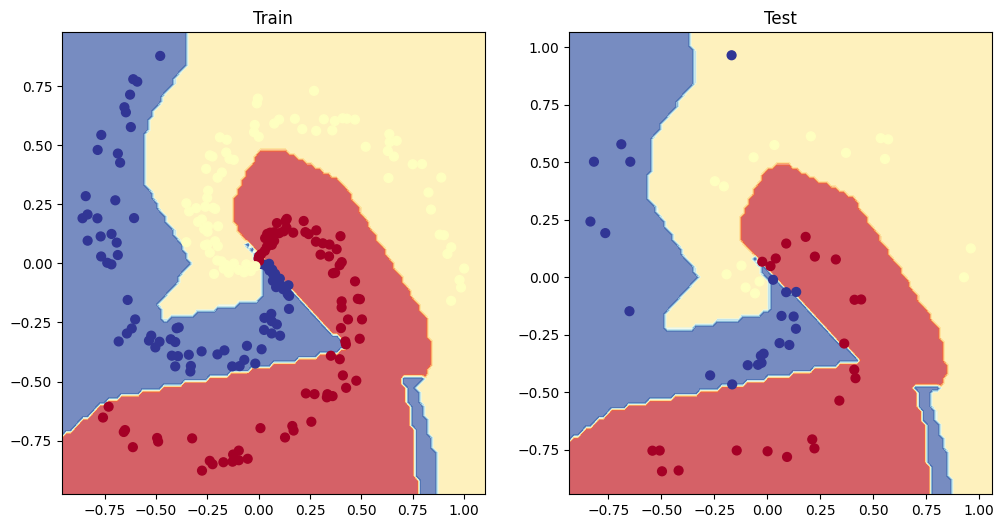

In [1529]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(modelspiral, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(modelspiral , x_test, y_test)